In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_train = pd.read_csv('../datasets/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('../datasets/Google_Stock_Price_Test.csv')

In [6]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [7]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [28]:
df_train['Volume']=df_train['Volume'].str.replace(',','').astype(float)

In [29]:
X_train=df_train[['Open','High','Low','Volume']]

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [31]:
X_train_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [32]:
import numpy as np
rows = []
y_train = []
for i in range(1198):
    row = X_train_scaled[i:60+i,:]
    rows.append(row)
    y_train.append(X_train_scaled[60+i,:])
X_train = np.array(rows)
y_train = np.array(y_train)
X_train.shape, y_train.shape

((1198, 60, 4), (1198, 4))

In [33]:
X_train = X_train.reshape(1198,60,4)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [35]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60,4)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [36]:
model.fit(X_train,y_train,batch_size=32, epochs=40)

Epoch 1/40
38/38 [==============================] - 22s 171ms/step - loss: 0.0616
Epoch 2/40
38/38 [==============================] - 6s 167ms/step - loss: 0.0525
Epoch 3/40
38/38 [==============================] - 7s 175ms/step - loss: 0.0513
Epoch 4/40
38/38 [==============================] - 7s 173ms/step - loss: 0.0508
Epoch 5/40
38/38 [==============================] - 7s 173ms/step - loss: 0.0501
Epoch 6/40
38/38 [==============================] - 7s 174ms/step - loss: 0.0497
Epoch 7/40
38/38 [==============================] - 7s 174ms/step - loss: 0.0496
Epoch 8/40
38/38 [==============================] - 6s 167ms/step - loss: 0.0499
Epoch 9/40
38/38 [==============================] - 7s 173ms/step - loss: 0.0496
Epoch 10/40
38/38 [==============================] - 7s 173ms/step - loss: 0.0493
Epoch 11/40
38/38 [==============================] - 7s 173ms/step - loss: 0.0490
Epoch 12/40
38/38 [==============================] - 7s 173ms/step - loss: 0.0489
Epoch 13/40
38/38 [=====

In [40]:
df_test['Volume']=df_test['Volume'].str.replace(',','').astype(float)

In [41]:
X_test_scaled = scaler.transform(df_test[['Open','High','Low','Volume']])
X_test_scaled

array([[0.92955205, 0.94948363, 0.9444234 , 0.06605527],
       [0.94731751, 0.95267709, 0.9583649 , 0.04265519],
       [0.94307612, 0.95854109, 0.96188816, 0.05315579],
       [0.96015329, 0.98360319, 0.97548871, 0.06537044],
       [0.98087655, 0.98746895, 0.99562434, 0.05064077],
       [0.98359253, 0.98590024, 0.99691241, 0.04681217],
       [0.97827219, 0.98407007, 0.99285877, 0.04237085],
       [0.98225314, 0.98265076, 0.98869147, 0.05387265],
       [0.98288563, 0.98980335, 1.00293605, 0.04370445],
       [0.98214153, 0.98218388, 0.99096454, 0.05423308],
       [0.979779  , 0.98044708, 0.99213896, 0.05152183],
       [0.97849542, 0.98655387, 0.99367328, 0.0364998 ],
       [0.98182528, 0.98175435, 0.99346492, 0.06656388],
       [0.98245777, 1.0078249 , 0.99734808, 0.07832199],
       [1.01045465, 1.01721852, 1.02401879, 0.05871446],
       [1.02407173, 1.03565092, 1.03773299, 0.05953544],
       [1.03930724, 1.03981549, 1.04142673, 0.11878254],
       [1.03354044, 1.04719219,

In [42]:
X_test = np.vstack([X_train_scaled[-60:], X_test_scaled])

In [43]:
X_test.shape

(80, 4)

In [44]:
rows = []
for i in range(20):
    row = X_test[i:60+i,:]
    rows.append(row)
X_test = np.array(rows)

X_test.shape

(20, 60, 4)

In [46]:
X_test = X_test.reshape(20,60,4)

In [47]:
yp = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [48]:
yp

array([[0.64728886],
       [0.64529973],
       [0.6432782 ],
       [0.64155614],
       [0.640608  ],
       [0.6408224 ],
       [0.642215  ],
       [0.64446676],
       [0.64718854],
       [0.65012866],
       [0.65295935],
       [0.65543336],
       [0.6574246 ],
       [0.6589539 ],
       [0.66022867],
       [0.66169906],
       [0.66378695],
       [0.6667703 ],
       [0.6704491 ],
       [0.67383206]], dtype=float32)

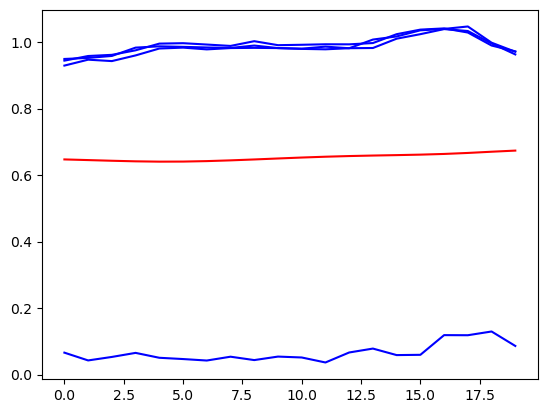

In [49]:
plt.plot(X_test_scaled,c='blue')
plt.plot(yp,c='red')